<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [134]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Loading Data**

In [135]:
df=pd.read_csv('/content/diabetes.csv')
# load dataset

In [136]:
import matplotlib.pyplot as plt

**Feature Selection**

In [137]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

**Splitting Data**

In [139]:
#split dataset in features and target variable

In [140]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [141]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [142]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifer
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=50)
clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred=clf.predict(x_test)

**Evaluating Model**

In [143]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7401574803149606

### Train score

In [144]:
y_pred=clf.predict(x_train)

In [145]:
accuracy_score(y_train,y_pred)

0.7879377431906615

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [146]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Text(0.5, 0.875, 'X[1] <= 127.5\ngini = 0.45\nsamples = 514\nvalue = [338, 176]'),
 Text(0.25, 0.625, 'X[7] <= 39.5\ngini = 0.28\nsamples = 309\nvalue = [257, 52]'),
 Text(0.125, 0.375, 'X[0] <= 6.5\ngini = 0.196\nsamples = 245\nvalue = [218, 27]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 227\nvalue = [208, 19]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.375, 0.375, 'X[5] <= 26.9\ngini = 0.476\nsamples = 64\nvalue = [39, 25]'),
 Text(0.3125, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 51\nvalue = [27, 24]'),
 Text(0.75, 0.625, 'X[5] <= 29.95\ngini = 0.478\nsamples = 205\nvalue = [81, 124]'),
 Text(0.625, 0.375, 'X[1] <= 145.5\ngini = 0.42\nsamples = 60\nvalue = [42, 18]'),
 Text(0.5625, 0.125, 'gini = 0.278\nsamples = 36\nvalue = [30, 6]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.875, 0.375, 'X[1] <= 165.5\ngini = 0.393\nsamples = 145\nvalue = [39, 106

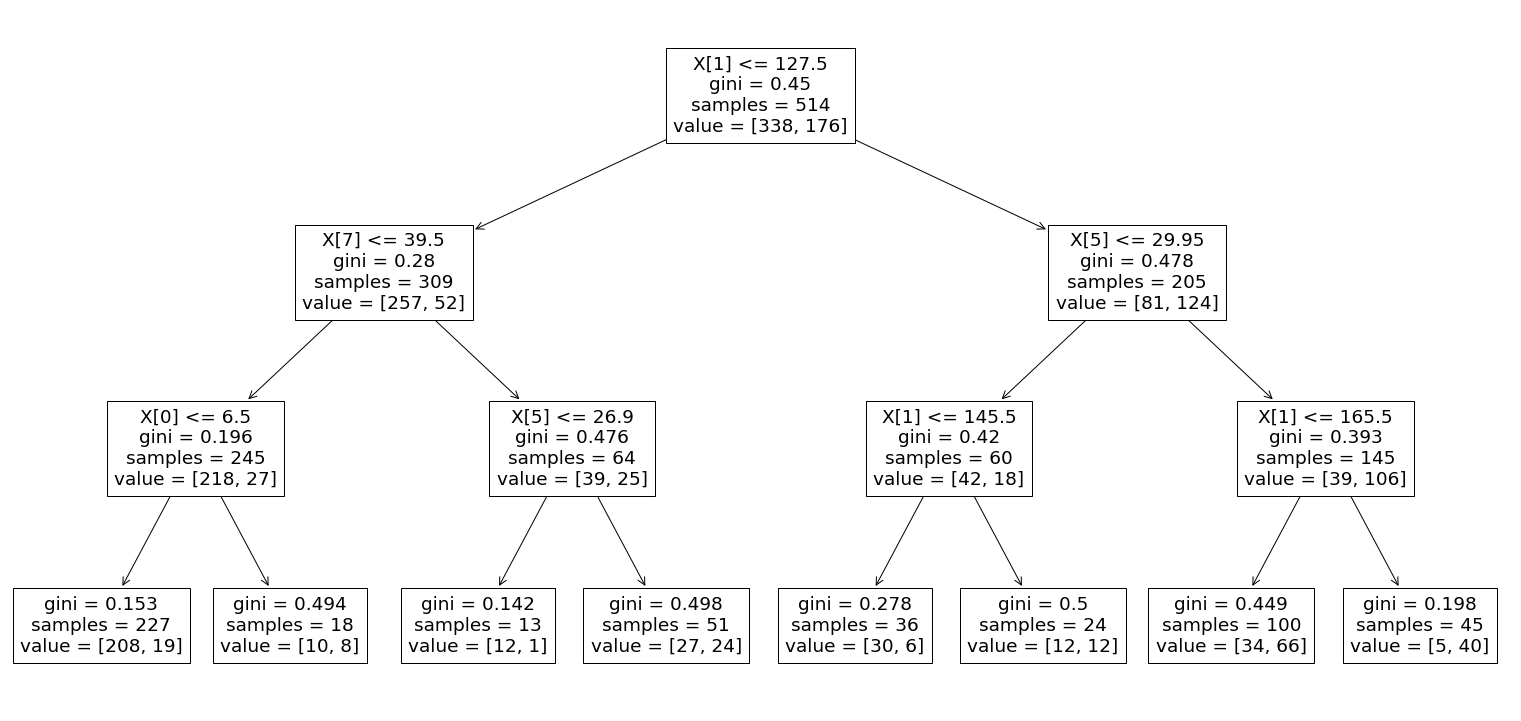

In [147]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(27,13))
import pydotplus
tree.plot_tree(clf.fit(x_train,y_train))

In [148]:
type(x_train)

pandas.core.frame.DataFrame

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

## Criterion: Entropy

In [149]:
# Create Decision Tree classifer object
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=50)
# Train Decision Tree Classifer
clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred=clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test,y_pred)

0.7440944881889764

In [150]:
y_pred=clf.predict(x_train)
accuracy_score(y_train,y_pred)

0.791828793774319

**Visualizing Decision Trees**

[Text(0.5, 0.875, 'X[1] <= 127.5\nentropy = 0.927\nsamples = 514\nvalue = [338, 176]'),
 Text(0.25, 0.625, 'X[7] <= 30.5\nentropy = 0.654\nsamples = 309\nvalue = [257, 52]'),
 Text(0.125, 0.375, 'X[5] <= 45.4\nentropy = 0.412\nsamples = 193\nvalue = [177, 16]'),
 Text(0.0625, 0.125, 'entropy = 0.361\nsamples = 189\nvalue = [176, 13]'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.375, 'X[5] <= 27.0\nentropy = 0.894\nsamples = 116\nvalue = [80, 36]'),
 Text(0.3125, 0.125, 'entropy = 0.242\nsamples = 25\nvalue = [24, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.961\nsamples = 91\nvalue = [56, 35]'),
 Text(0.75, 0.625, 'X[5] <= 29.95\nentropy = 0.968\nsamples = 205\nvalue = [81, 124]'),
 Text(0.625, 0.375, 'X[6] <= 0.613\nentropy = 0.881\nsamples = 60\nvalue = [42, 18]'),
 Text(0.5625, 0.125, 'entropy = 0.96\nsamples = 47\nvalue = [29, 18]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'X[1] <= 165.5\nentropy

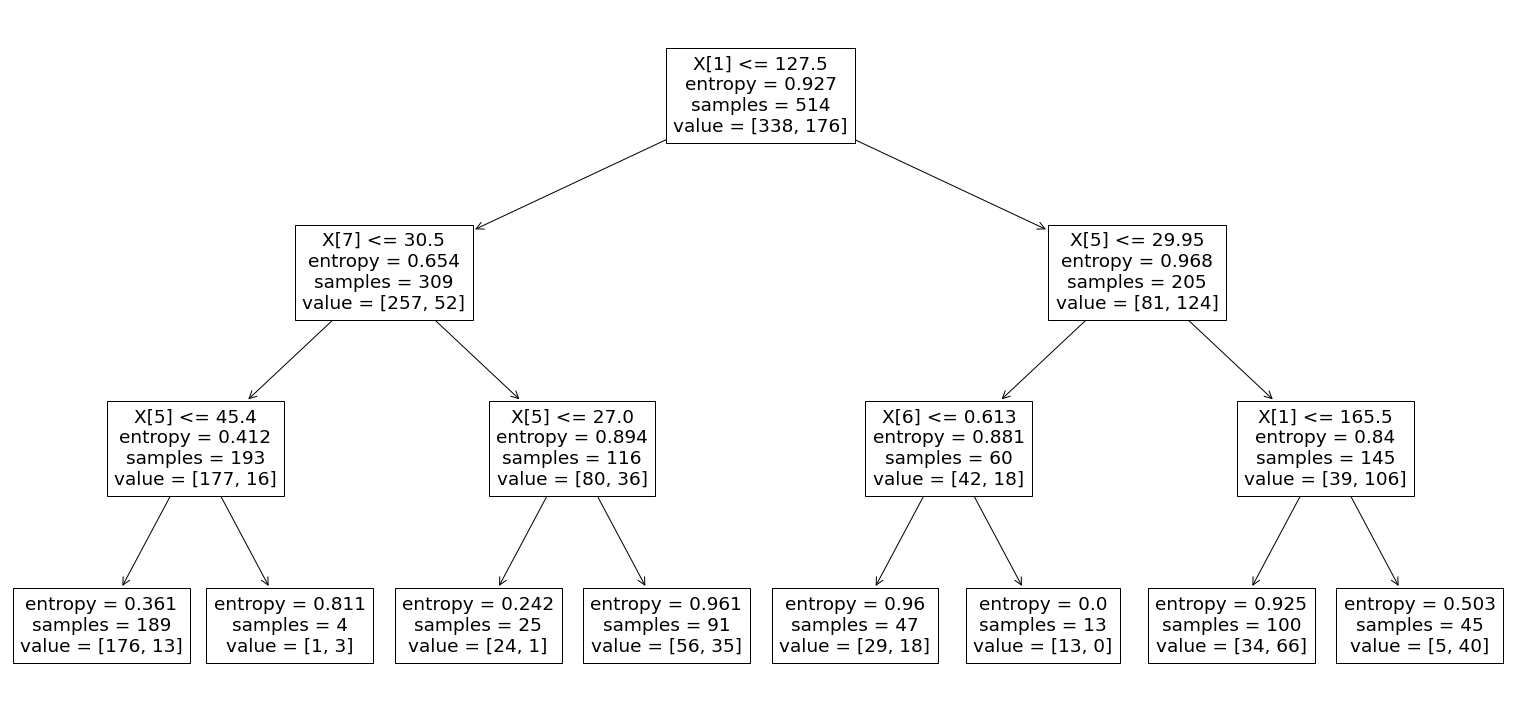

In [151]:
plt.figure(figsize=(27,13))
tree.plot_tree(clf.fit(x_train,y_train))

**Implement Random Forest**

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)


In [153]:
# Create RandomForest Tree classifer object
clf=RandomForestClassifier(random_state=50,n_estimators=100,max_depth=3)

In [154]:
# Train RandomForest Tree Classifer
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=50)

In [155]:
#Predict the response for test dataset
y_pred=clf.predict(x_test)

In [156]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7362204724409449

In [157]:
y_pred=clf.predict(x_train)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.8035019455252919

The accuracy of the training data is much more that the test data. Hence, the model overfits.

## Feature importance:

In [159]:
pd.Series(clf.feature_importances_,index=df.iloc[:,0:8].columns).sort_values(ascending=False)

Glucose                     0.406518
BMI                         0.180192
Age                         0.172298
DiabetesPedigreeFunction    0.072514
Pregnancies                 0.061439
Insulin                     0.043734
BloodPressure               0.038390
SkinThickness               0.024915
dtype: float64

If the model overfitting try out different way to fix it!!

## Changing values of n estimators & max depth.

In [160]:
clf=RandomForestClassifier(random_state=50,n_estimators=30,max_depth=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [161]:
accuracy_score(y_test,y_pred)

0.7677165354330708

In [162]:
y_pred=clf.predict(x_train)

In [163]:
accuracy_score(y_train,y_pred)

0.7859922178988327

### All the best!!! I hope you will Enjoy the Task!